In [27]:
import json
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager

api_key = 'eW4p0oktgWfTP5ycSABmfuYreNwBy9Cu7UtVSbV8LMpsR0Ik0XVJJs4bzEjjD759'
api_secret = 'hVDpfjDK3hRmGiVsXLPhYhetLjuTwgWw7TP0YVawWM3y9sOkIQn18jvM2wiAwL57'

client = Client(api_key, api_secret)
depth = client.get_order_book(symbol='ETHBRL')

In [7]:
order = client.create_test_order(
    symbol='BNBBTC',
    side=Client.SIDE_BUY,
    type=Client.ORDER_TYPE_MARKET,
    quantity=100)

prices = client.get_all_tickers()

print(next((asset for asset in prices if asset['symbol'] == 'ETHBRL'), None))

{'symbol': 'ETHBRL', 'price': '13290.06000000'}


In [23]:
symbol = 'ETHBRL'

klines = client.get_historical_klines(symbol, Client.KLINE_INTERVAL_1DAY, "365 day ago UTC")

candles = []

for line_index in range(0, len(klines)):
    line = klines[line_index]
    candle = {'open_time': float(line[0]/1000), 'open': float(line[1]), 'high': float(line[2]), 'low': float(line[3]),
              'close': float(line[4]), 'volume': float(line[5]), 'asset_volume': float(line[7]),
              'n_trades': float(line[8])}

    if candle['open_time'] and candle['close']:
        candles.append(candle)

In [24]:
from matplotlib import pyplot as plt

df = pd.DataFrame(candles)

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [25]:
train_df.head()

,open_time,open,high,low,close,volume,asset_volume,n_trades
0,1.611619e+09,7287.51,7631.53,6850.00,7387.92,1421.91480,1.025536e+07,6429.0
1,1.611706e+09,7359.30,7426.34,6591.00,6800.00,1787.34812,1.238733e+07,7439.0
2,1.611792e+09,6797.87,7423.02,6700.86,7246.22,1241.62199,8.945970e+06,5290.0
3,1.611878e+09,7259.26,7750.74,6989.94,7580.00,2496.30527,1.865110e+07,11244.0
4,1.611965e+09,7589.92,7725.00,7324.79,7536.77,934.03693,7.019668e+06,4483.0


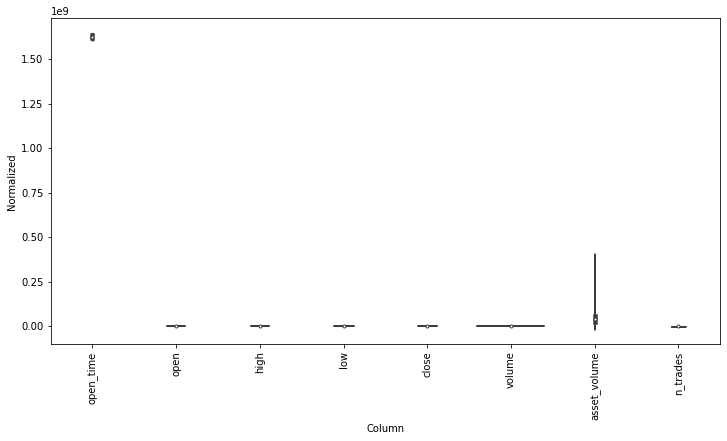

In [28]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)